In [18]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [19]:
!pip install fastai==1.0.24

spacy 2.0.16 has requirement regex==2018.01.10, but you'll have regex 2017.4.5 which is incompatible.
mkl-devel 2018.0.3 has requirement mkl==2018.0.3, but you'll have mkl 2019.0 which is incompatible.
menpo 0.8.1 has requirement matplotlib<2.0,>=1.4, but you'll have matplotlib 2.2.3 which is incompatible.
menpo 0.8.1 has requirement pillow<5.0,>=3.0, but you'll have pillow 5.2.0 which is incompatible.
menpo 0.8.1 has requirement scipy<1.0,>=0.16, but you'll have scipy 1.1.0 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [20]:
from fastai import *
from fastai.vision import *

In [21]:
path = Path('/floyd/home/week-3/data')

## Multiclassification

In [22]:
df = pd.read_csv(path/'labels.csv')
df.head()

,image_name,tags
0,train_0.png,mozzarella_cheese tomato_sauce pepperoni sausage
1,train_1.png,mozzarella_cheese tomato_sauce pepperoni sausage
2,train_2.png,mozzarella_cheese tomato_sauce pepperoni sausage
3,train_3.png,mozzarella_cheese tomato_sauce pepperoni sausage
4,train_4.png,mozzarella_cheese tomato_sauce pepperoni sausage


In [23]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [6]:
# !pip install fastai==1.0.22

spacy 2.0.16 has requirement regex==2018.01.10, but you'll have regex 2017.4.5 which is incompatible.
mkl-devel 2018.0.3 has requirement mkl==2018.0.3, but you'll have mkl 2019.0 which is incompatible.
menpo 0.8.1 has requirement matplotlib<2.0,>=1.4, but you'll have matplotlib 2.2.3 which is incompatible.
menpo 0.8.1 has requirement pillow<5.0,>=3.0, but you'll have pillow 5.2.0 which is incompatible.
menpo 0.8.1 has requirement scipy<1.0,>=0.16, but you'll have scipy 1.1.0 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [24]:
np.random.seed(42)
src = (ImageItemList.from_csv(path, 'labels.csv', folder='photos', suffix='')
       .random_split_by_pct(0.2)
       .label_from_df(sep=' '))

In [25]:
data = (src.transform(tfms, size=128)
       .databunch().normalize(imagenet_stats))

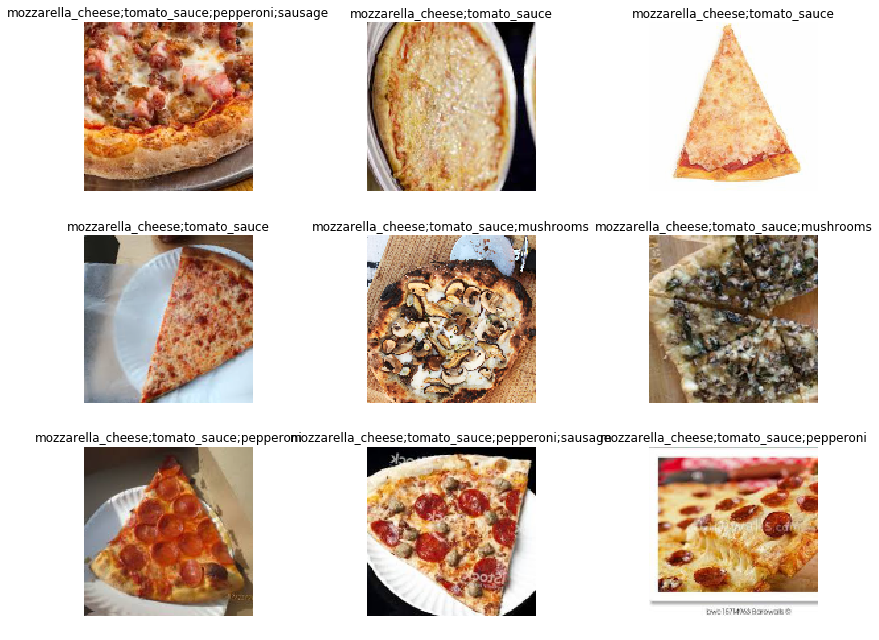

In [26]:
data.show_batch(rows=3, figsize=(12,9))

In [27]:
arch = models.resnet50

In [28]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = create_cnn(data, arch, metrics=[acc_02, f_score])

In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


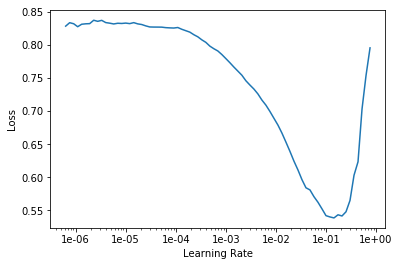

In [30]:
learn.recorder.plot()

In [31]:
lr = 0.01

In [32]:
learn.fit_one_cycle(5, slice(lr))

Total time: 00:10
epoch  train_loss  valid_loss  accuracy_thresh  fbeta   
1      0.765670    1.290793    0.581081         0.686774  (00:03)
2      0.694393    0.673519    0.734234         0.852787  (00:01)
3      0.602412    0.718393    0.743243         0.824543  (00:01)
4      0.533230    0.562783    0.801802         0.894938  (00:01)
5      0.476101    0.463279    0.788288         0.891933  (00:01)



In [33]:
learn.save('stage-1-rn-50')

In [34]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


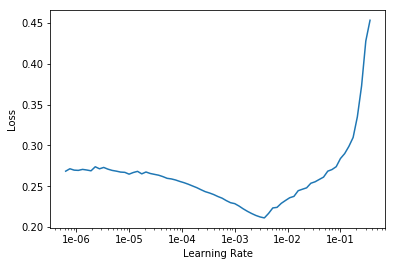

In [35]:
learn.lr_find()
learn.recorder.plot()

In [36]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

Total time: 00:10
epoch  train_loss  valid_loss  accuracy_thresh  fbeta   
1      0.287493    0.399646    0.788288         0.891159  (00:02)
2      0.266777    0.369878    0.792793         0.893768  (00:02)
3      0.243277    0.360128    0.788288         0.895222  (00:02)
4      0.232158    0.343061    0.819820         0.905862  (00:02)
5      0.216884    0.328961    0.828829         0.907800  (00:02)



In [37]:
learn.save('stage-2-rn50')

In [38]:
inter = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.6/site-packages/torch/nn/functional.py:1101: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


RuntimeError: Expected object of scalar type Float but got scalar type Long for argument #2 'other'